In [24]:
# imports y definiciones comunes

import datetime
import time
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
from typing import List, Tuple, Dict

demographic_categories = {
  459381:"Water and other public services",
  466907:"Electricity",
  473173:"Household furnishings",
  503218:"Natural gas",
  503701:"Miscellaneous",
  510031:"Gifts",
  520660:"Healthcare",
  523927:"Restaurants",
  527449:"Alcohol",
  536346:"Home maintenance",
  537281:"Housekeeping supplies",
  552988:"Money income before taxes",
  567195:"Personal insurance and pensions",
  571970:"Reading",
  575030:"Transportation",
  577992:"Education",
  580426:"Telephone services",
  589943:"Lodging away from home",
  595298:"Groceries",
  595581:"Donations",
  606730:"Entertainment",
  616315:"Apparel and services",
  620120:"Personal taxes",
  621924:"Mortgage payments",
  630626:"Rented dwellings",
  632961:"Personal care products and services",
  640784:"Tobacco",
  642329:"Household operations",
  644226:"Property taxes",
}

eTypes: Dict[int, str] = {
    0: 'email',
    1: 'phone',
    2: 'sells',
    3: 'buys',
    4: 'author',
    5: 'financial',
    6: 'travels_to',
}

eTypes_inv: Dict[str, int] = {v: k for k, v in eTypes.items()}

jan_1_2025 = datetime.datetime(2025, 1, 1, 0, 0)

def to_datetime(seconds: int) -> datetime.datetime:
    return jan_1_2025 + datetime.timedelta(seconds=seconds)

def file_to_full_dataframe(file: str) -> pd.DataFrame:
    dataframe = pd.read_csv(file) 
    dataframe['Epoch']          = dataframe.Time.apply(lambda t: int(to_datetime(t).timestamp()))
    dataframe['formatted_Time'] = dataframe.Time.apply(lambda t: to_datetime(t).strftime("%Y-%m-%d,%H:%M:%S"))
    dataframe['day']            = dataframe.Time.apply(lambda t: to_datetime(t).strftime("%Y-%m-%d"))
    dataframe['source_target']  = dataframe.Source.astype(str) + '-' + dataframe.Target.astype(str)
    dataframe['demo_category']  = dataframe.Target.apply(lambda t: demographic_categories.get(t, "NA"))
    return dataframe

def fill_dataframes() -> None:
    file_to_full_dataframe("data/CGCS-Template.csv").to_csv("data/template.csv")
    file_to_full_dataframe("data/Q1-Graph1.csv").to_csv("data/candidato1.csv")
    file_to_full_dataframe("data/Q1-Graph2.csv").to_csv("data/candidato2.csv")
    file_to_full_dataframe("data/Q1-Graph3.csv").to_csv("data/candidato3.csv")
    file_to_full_dataframe("data/Q1-Graph4.csv").to_csv("data/candidato4.csv")
    file_to_full_dataframe("data/Q1-Graph5.csv").to_csv("data/candidato5.csv")

In [74]:
# llenar dataframes y guardarlos
    
# fill_dataframes()

In [27]:
# cargar template y candidatos

template   = pd.read_csv("data/template.csv")
candidato1 = pd.read_csv("data/candidato1.csv")
candidato2 = pd.read_csv("data/candidato2.csv")
candidato3 = pd.read_csv("data/candidato3.csv")
candidato4 = pd.read_csv("data/candidato4.csv")
candidato5 = pd.read_csv("data/candidato5.csv")

In [118]:
# crear heatmap

def build_heatmap(df: pd.DataFrame, edgeType: str) -> (np.matrix, List[int]):
    eType: int                      = eTypes_inv[edgeType]
    channel: pd.Series              = df.loc[df.eType.isin([eType])]
    edges: List[Tuple[int,int,int]] = [(row.Source, row.Target, row.Weight) for (_,row) in channel.iterrows()]
    if not(edges): return (np.empty([0,0]), list())
    G: nx.DiGraph                   = nx.DiGraph(directed=True)
    G.add_weighted_edges_from(edges)
    adjancency_matrix: np.matrix    = nx.adjacency_matrix(G).todense()
    labels: List[int]               = list(nx.convert.to_dict_of_dicts(G).keys())
    return (adjancency_matrix, labels)

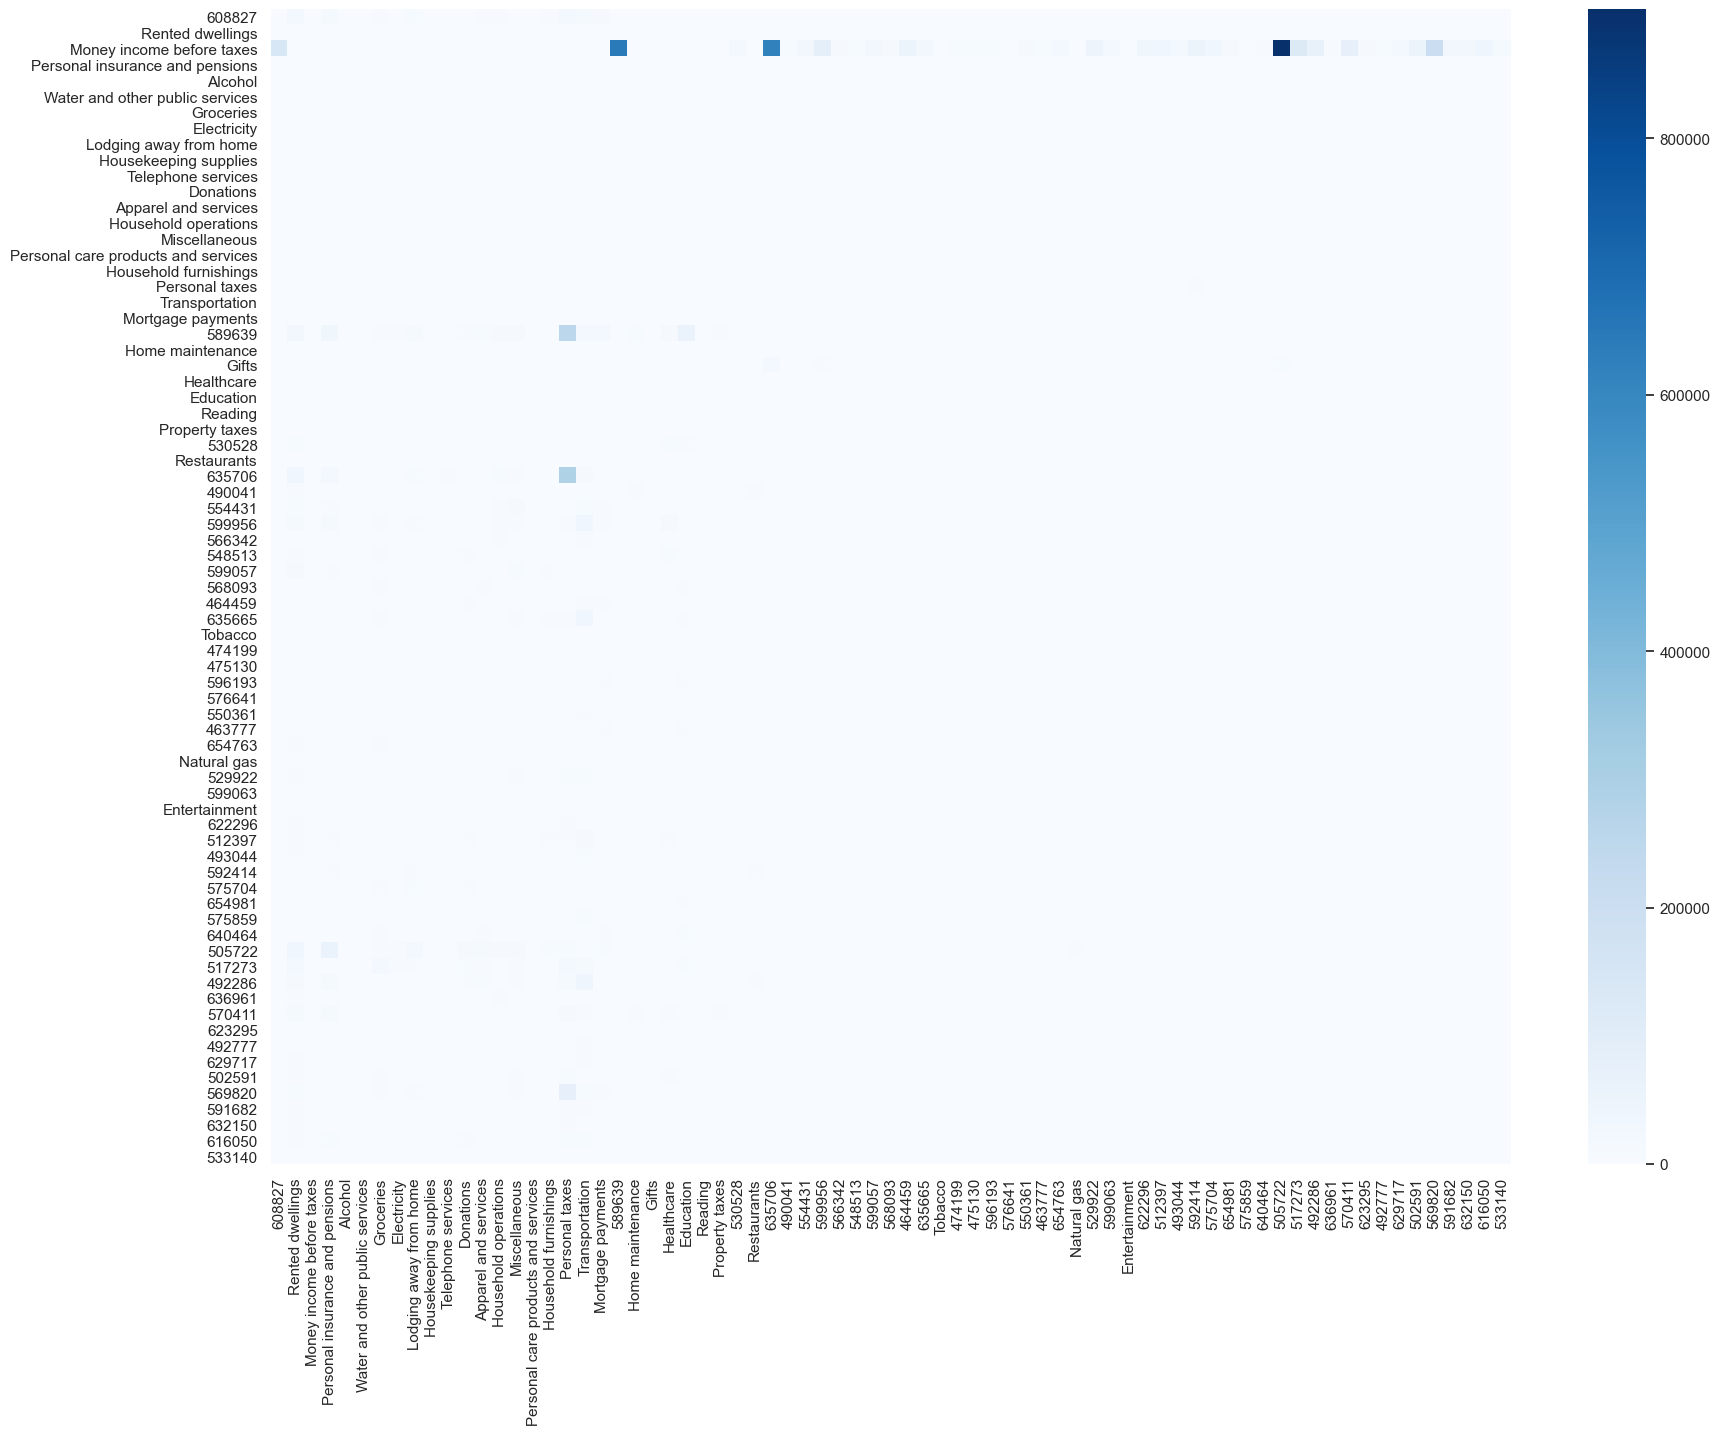

In [178]:
# dibujar heatmap de un (dataframe, canal) particular

plt.gcf().set_size_inches(20, 15)
plt.style.use('dark_background')
sns.reset_defaults()
sns.set(rc={'axes.facecolor':'white','figure.facecolor':'white'})

df: pd.DataFrame = candidato1
eType: str       = 'financial'    
    
(adjancency_matrix, labels) = build_heatmap(df, eType)

mapped_labels = []
for x in labels:
    if x in demographic_categories.keys(): mapped_labels.append(demographic_categories[x])
    else: mapped_labels.append(x)

sns.heatmap(adjancency_matrix, xticklabels=mapped_labels, yticklabels=mapped_labels, cmap="Blues")

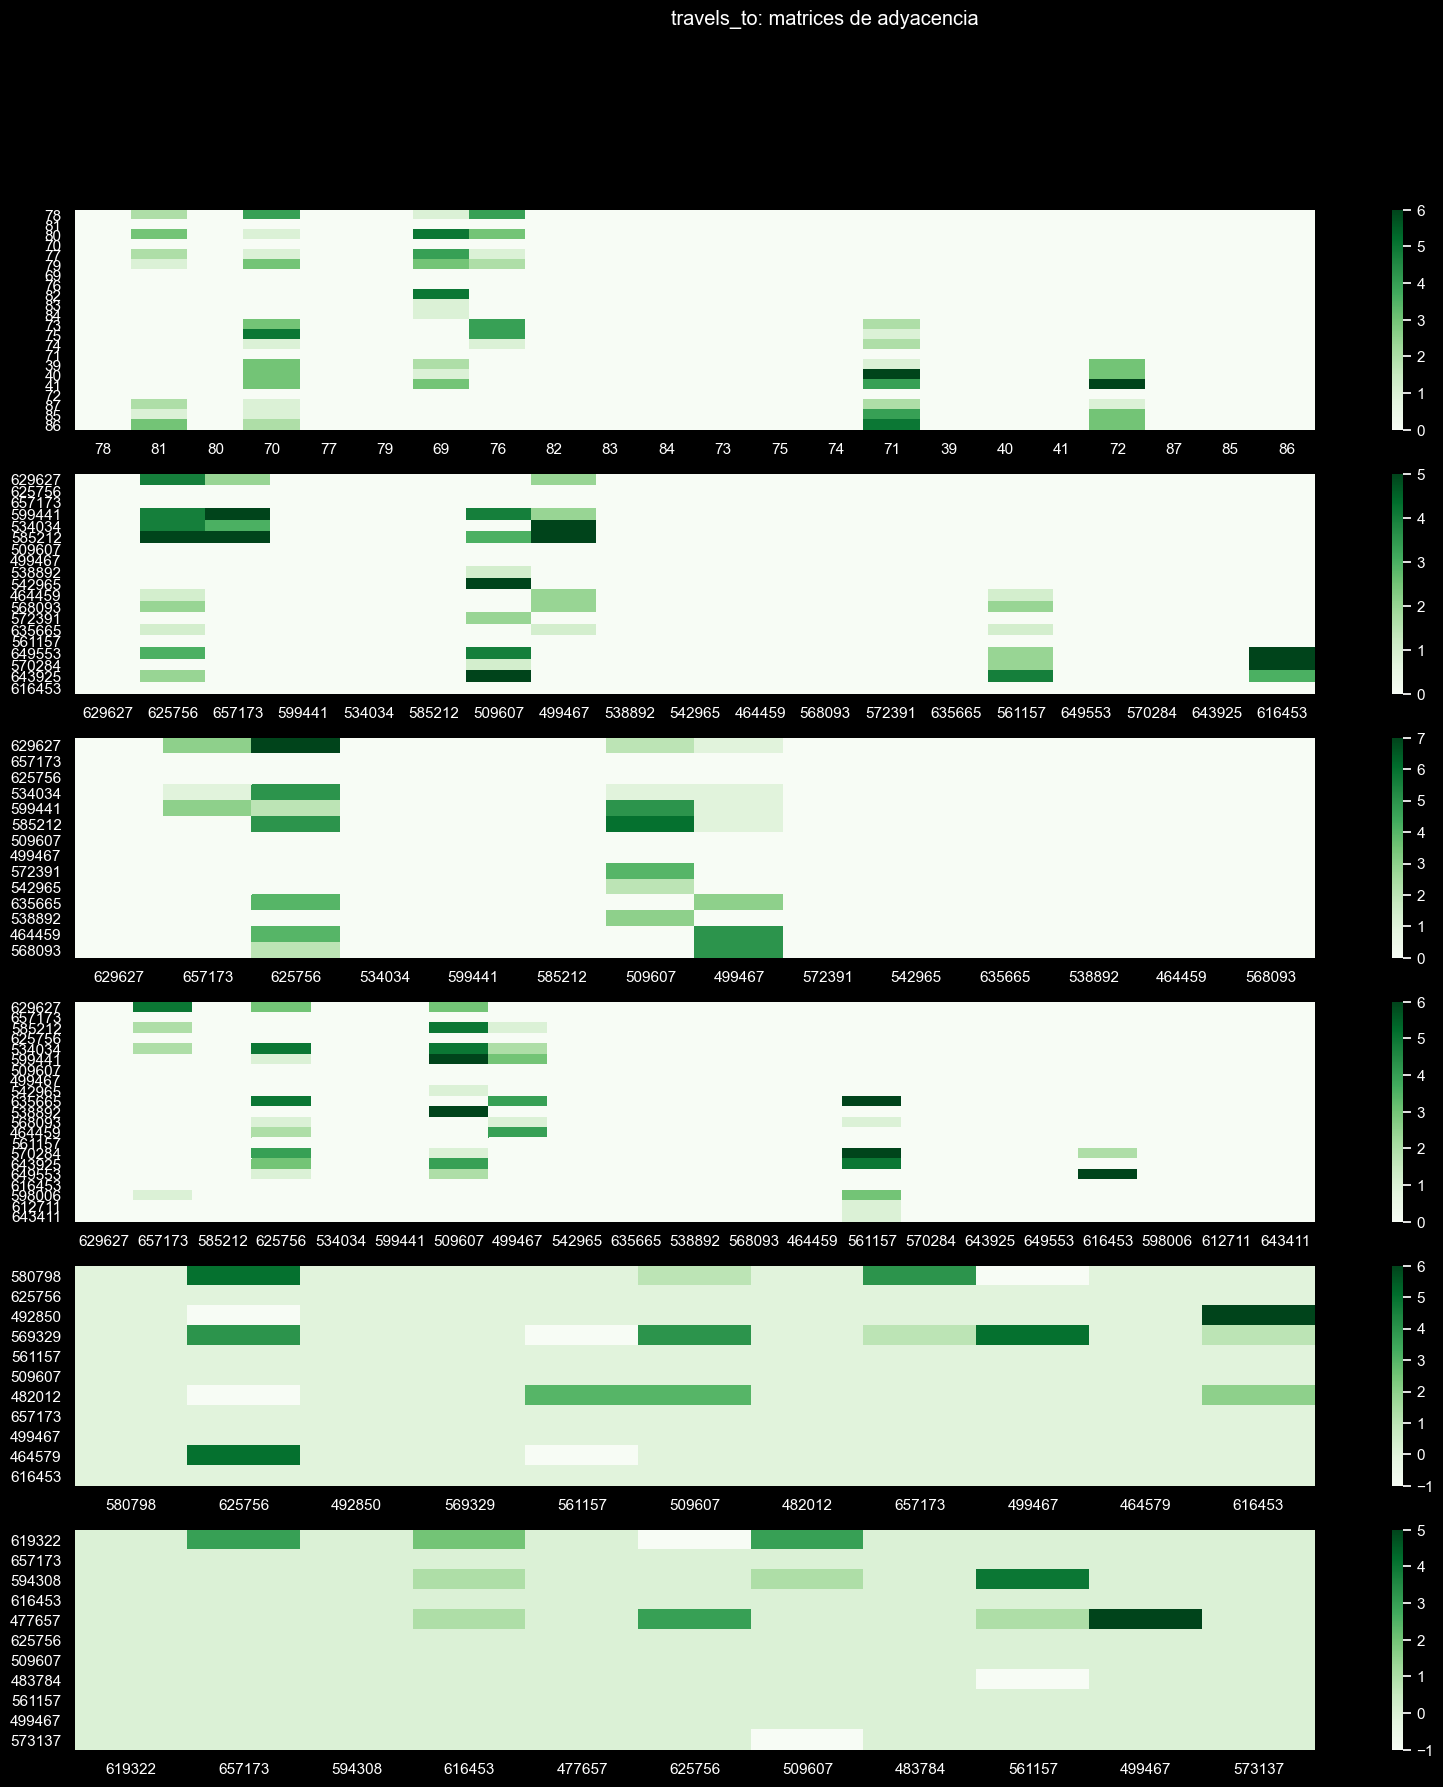

In [183]:
# comparar matrices de adyacencia, ploteadas como heatmaps

comparables: List[pd.DataFrame] = [template, candidato1, candidato2, candidato3, candidato4, candidato5]
eType: str                      = 'travels_to'

fig, axs = plt.subplots(nrows=len(comparables), ncols=1, figsize=(20,20))
fig.suptitle(eType + ': matrices de adyacencia')
plt.style.use('dark_background')

for (subplot_n, df) in enumerate(comparables):
    (adjancency_matrix, labels) = build_heatmap(df, eType)
    if not labels:
        sns.heatmap([[0]], xticklabels=[], yticklabels=[], ax=axs[subplot_n])    
    else:
        sns.heatmap(adjancency_matrix, xticklabels=labels, yticklabels=labels, ax=axs[subplot_n], cmap="Greens")

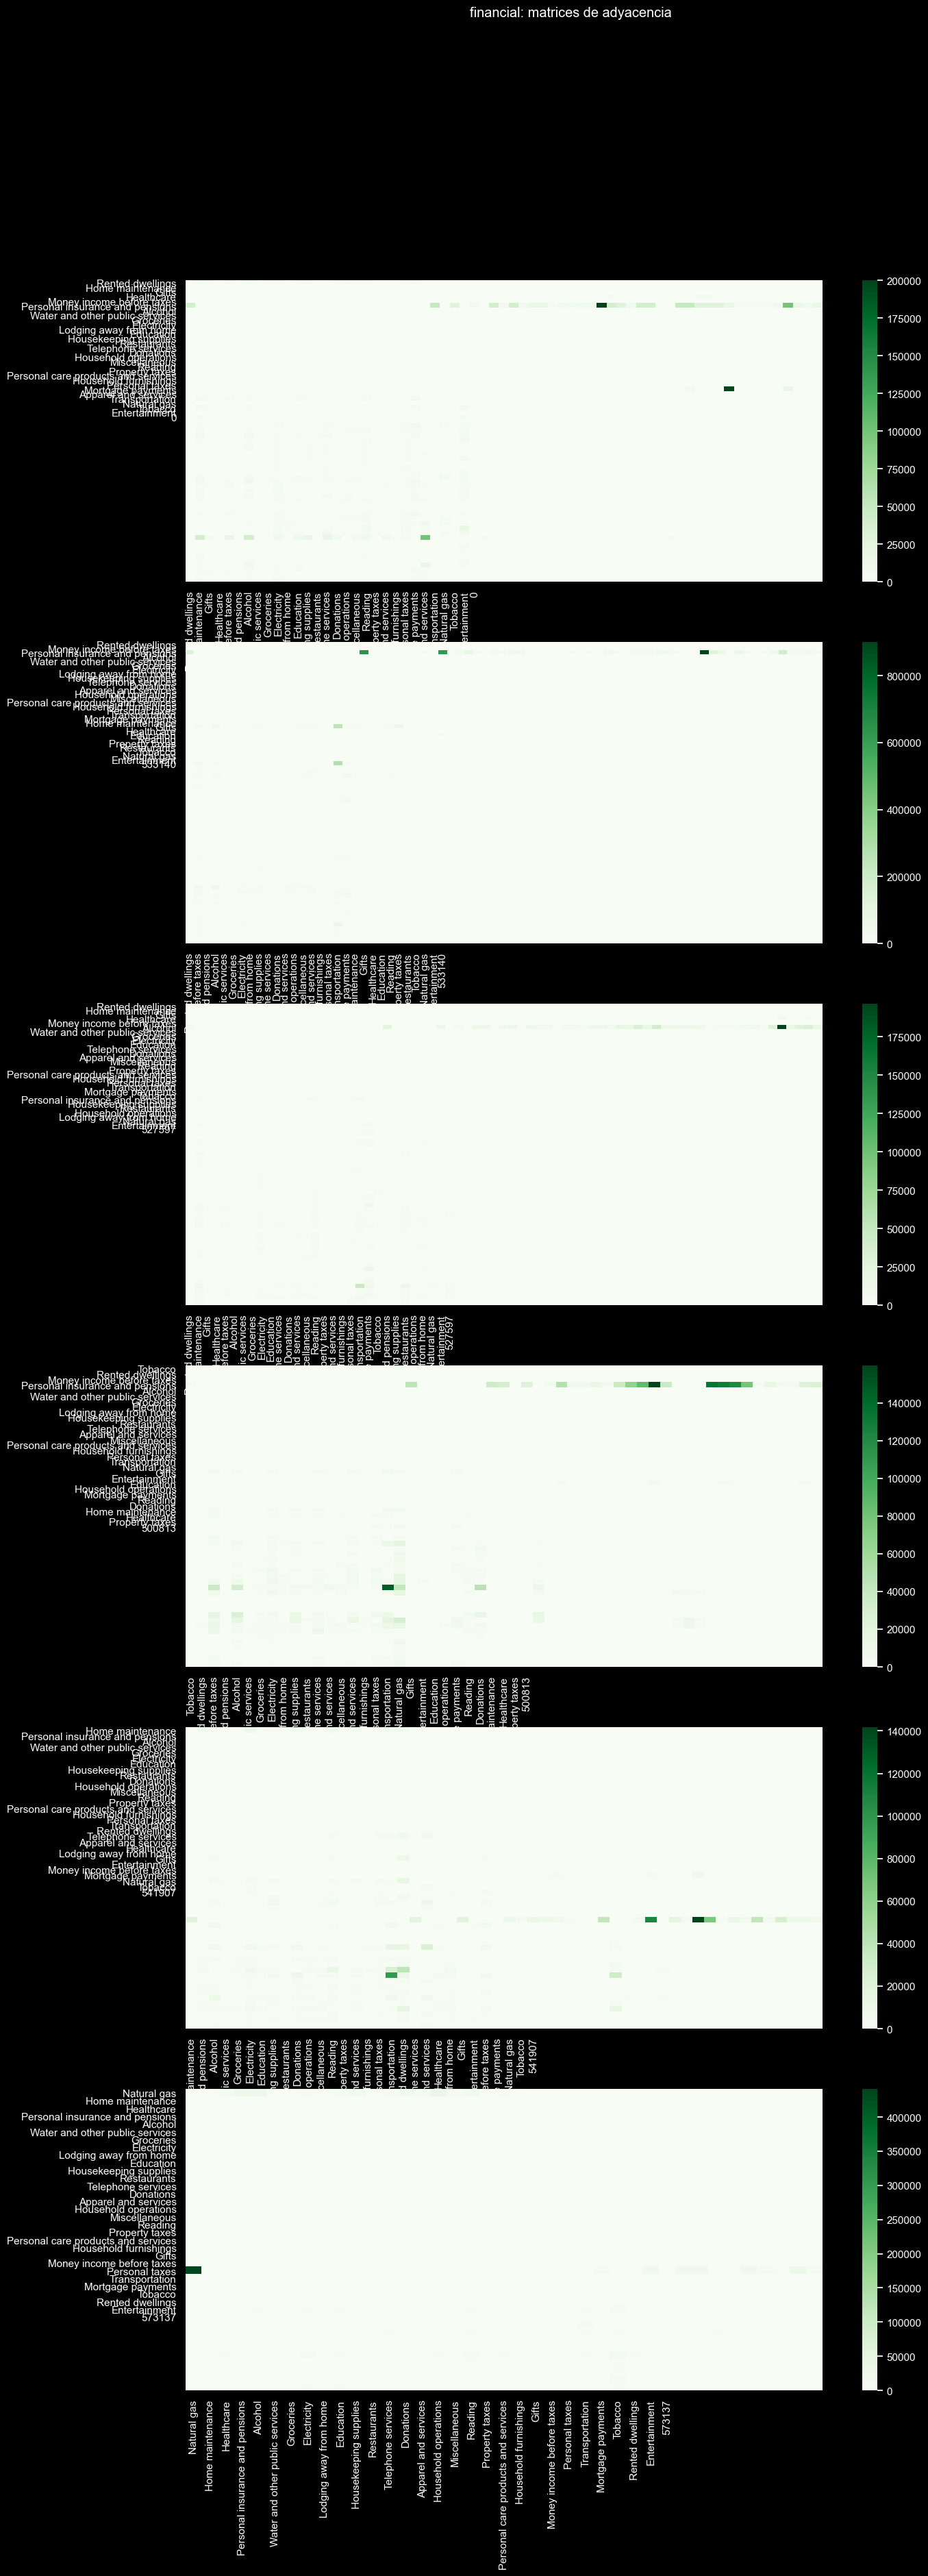

In [186]:
# comparar matrices de adyacencia, ploteadas como heatmaps

comparables: List[pd.DataFrame] = [template, candidato1, candidato2, candidato3, candidato4, candidato5]
eType: str                      = 'financial'

fig, axs = plt.subplots(nrows=len(comparables), ncols=1, figsize=(15,40))
fig.suptitle(eType + ': matrices de adyacencia')
plt.style.use('dark_background')

for (subplot_n, df) in enumerate(comparables):
    (adjancency_matrix, labels) = build_heatmap(df, eType)
    if not labels:
        sns.heatmap([[0]], xticklabels=[], yticklabels=[], ax=axs[subplot_n])    
    else:
        mapped_labels = []
        for x in labels:
            if x in demographic_categories.keys(): mapped_labels.append(demographic_categories[x])
        else: mapped_labels.append(x)
        sns.heatmap(adjancency_matrix, xticklabels=mapped_labels, yticklabels=mapped_labels, ax=axs[subplot_n], cmap="Greens")

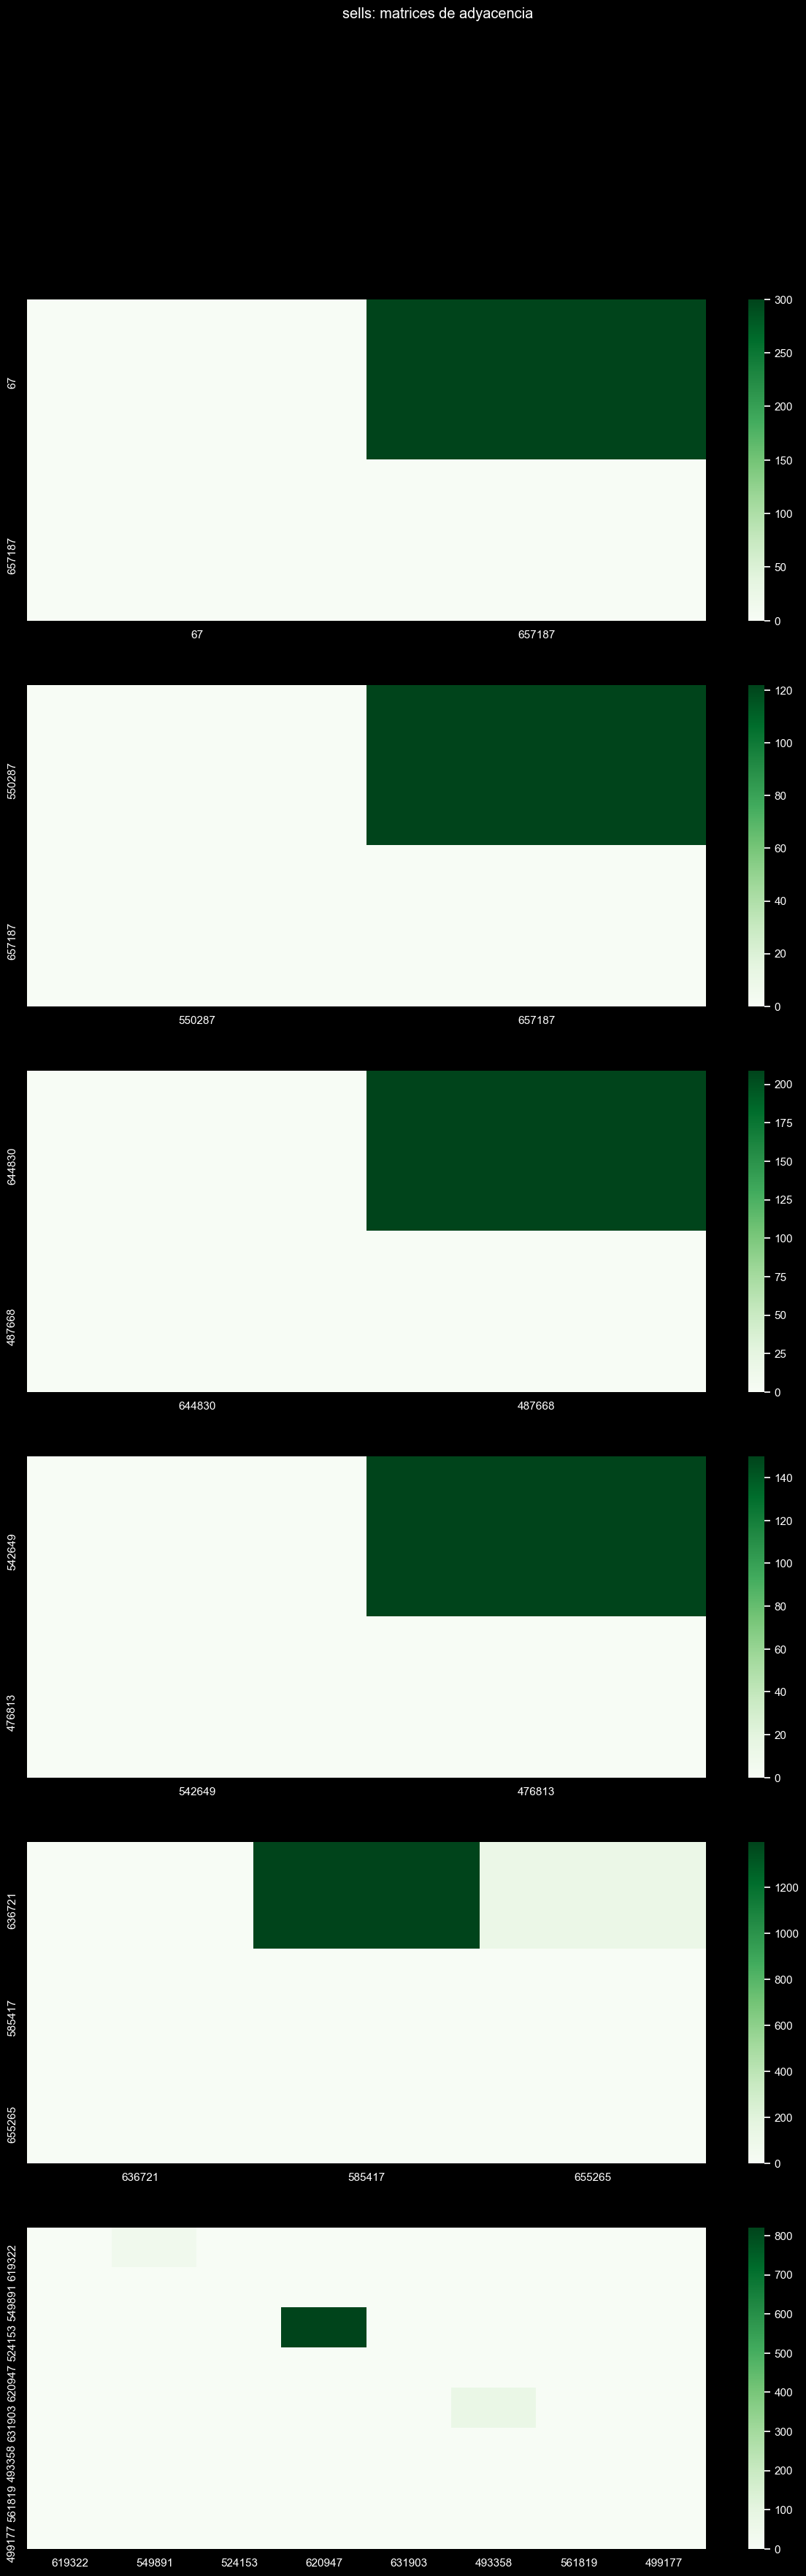

In [189]:
# comparar matrices de adyacencia, ploteadas como heatmaps

comparables: List[pd.DataFrame] = [template, candidato1, candidato2, candidato3, candidato4, candidato5]
eType: str                      = 'sells'

fig, axs = plt.subplots(nrows=len(comparables), ncols=1, figsize=(15,40))
fig.suptitle(eType + ': matrices de adyacencia')
plt.style.use('dark_background')

for (subplot_n, df) in enumerate(comparables):
    (adjancency_matrix, labels) = build_heatmap(df, eType)
    if not labels:
        sns.heatmap([[0]], xticklabels=[], yticklabels=[], ax=axs[subplot_n])    
    else:
        sns.heatmap(adjancency_matrix, xticklabels=labels, yticklabels=labels, ax=axs[subplot_n], cmap="Greens")

In [206]:
financial = template.loc[template.eType.isin([5])]
financial = financial.loc[template.Source == 2]
financial[['Source', 'Weight', 'demo_category']]

,Source,Weight,demo_category
634,2,5000,Rented dwellings
635,2,1000,Home maintenance
637,2,3000,Healthcare
639,2,4000,Personal insurance and pensions
640,2,100,Alcohol
641,2,900,Water and other public services
642,2,2000,Groceries
643,2,600,Electricity
644,2,2000,Lodging away from home
645,2,3000,Education


In [210]:
financial = template.loc[template.eType.isin([5])]
financial = financial.loc[template.Source == 552988]
financial[['Target', 'Weight']].sort_values(by =['Weight'], ascending=False)

,Target,Weight
927,44,200000
1245,63,100000
1068,53,50000
662,27,50000
1051,52,50000
638,2,40000
947,45,40000
725,33,40000
764,35,40000
1006,48,40000


In [227]:
pc = candidato1.loc[candidato1.eType.isin([2,3])]

procurement_operations = []
for index, row in pc.iterrows():
    if row['eType'] == 2:
        seller = row.Source
        item   = row.Target
        time   = row.formatted_Time
        weight = row.Weight
        buyer  = pc[(pc.formatted_Time==time)&(pc.Target==item)&(pc.eType==3)]['Source'].to_list()[0]
        procurement_operations.append((seller, item, buyer, weight, time))

import datetime
to_datetime = lambda s: datetime.datetime.strptime(s, '%Y-%m-%d,%H:%M:%S')
operation_dates = [to_datetime(x[4]) for x in procurement_operations]
diffs = [int((d2-d1).total_seconds()/60.0/60.0/24.0) for (d1,d2) in zip(operation_dates[:-1], operation_dates[1:])]

procurement_operations, operation_dates, diffs

([(550287, 657187, 512397, 170.0, '2025-04-29,15:18:05'),
  (550287, 657187, 512397, 314.0, '2025-05-25,05:02:12'),
  (550287, 657187, 512397, 445.0, '2025-06-17,17:00:22'),
  (550287, 657187, 512397, 792.0, '2025-07-08,06:47:42'),
  (550287, 657187, 512397, 331.0, '2025-07-13,23:09:18'),
  (550287, 657187, 512397, 430.0, '2025-07-23,20:52:15'),
  (550287, 657187, 512397, 122.0, '2025-07-24,12:36:47')],
 [datetime.datetime(2025, 4, 29, 15, 18, 5),
  datetime.datetime(2025, 5, 25, 5, 2, 12),
  datetime.datetime(2025, 6, 17, 17, 0, 22),
  datetime.datetime(2025, 7, 8, 6, 47, 42),
  datetime.datetime(2025, 7, 13, 23, 9, 18),
  datetime.datetime(2025, 7, 23, 20, 52, 15),
  datetime.datetime(2025, 7, 24, 12, 36, 47)],
 [25, 23, 20, 5, 9, 0])

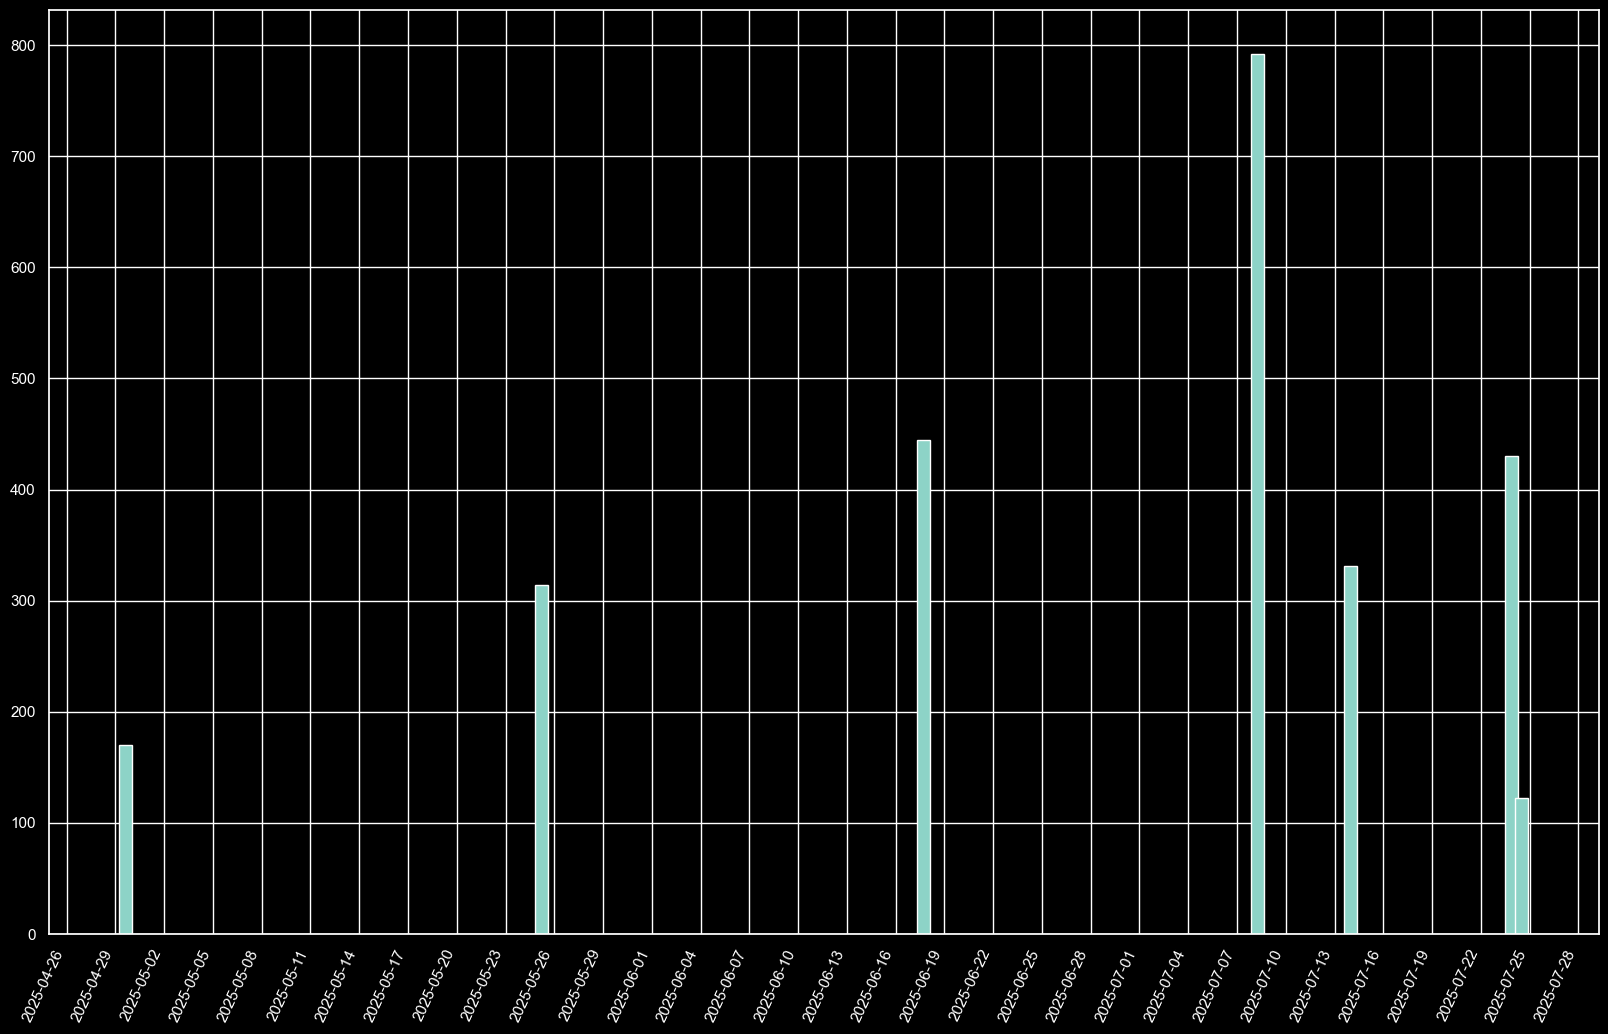

In [228]:
import matplotlib.dates as mdates

plt.style.use('dark_background')
x = operation_dates
y = [x[3] for x in procurement_operations]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.bar(x,y)
plt.xticks(rotation=65, ha='right')
plt.gcf().set_size_inches(20,12)